## Project title: 
# Predicting energy efficiency/consumption in buildings, using multi-output models

## Project brief

In a building, thermal energy involves two measures of cooling load (CL), and heating load (HL) and these measures are regulated by heating, ventilation, and air conditioning (HVAC) system. The HVAC system is designed to compute the HL and CL of the space and thereby, provide a desirable indoor air condition. 

Predicting heating and cooling needs of a building in the initial design phase to find out optimal solutions amongst different designs is very important, as well as in the operating phase of the building for efficient energy usage. In this project, different multi-output regression models were applied in predicting heating and cooling needs of buildings based on parameters such as building height, surface area, glazing area, wall area, and so on. 

The models used include Linear Regression, Ridge Regression, Lasso Regression, SVR, K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting, and Neural Network. These models were used as Multi-output models in this project because the aim was to simultaneously predict two target variables from the dataset; but since some models do not natively support direct multi-output predictions, all the six (6) models were individually fed into the MultiOutputRegressor Wrapper to aid multi-output predictions.  

Lastly, this dataset was taken from https://cml.ics.uci.edu/, based on research by Tsanas and Xifara, and consists of 768 observations and 10 variables (which are listed below). Eight (8) of these variables were used as features (input variables), while two (2) were used as predictors (output variables).

Input variables are: 
+ relative compactness 
+ roof area (in m²) 
+ overall height (in m) 
+ surface area (in m²) 
+ glazing area - 0%, 10%, 25%, 40% of floor area
+ wall area (in m²)
+ glazing area distribution of a building (already encoded) - 1:Uniform, 2:North, 3:East, 4:South, 5:West
+ orientation (already encoded) - 2:North, 3:East, 4:South, 5:West

Output variables: 
+ heating loads (in kWh)
+ cooling loads of the building (in kWh)


## 1. Load relevant libraries for data exploration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Load data

In [2]:
data = pd.read_csv('Building Energy Efficiency.csv')
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 3. Exploratory Data Analysis (EDA)

In [3]:
data.shape

(768, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
#check for duplicate rows

data.duplicated().sum()

0

**Using Kernel Density Estimate (KDE) plot to understand the distribution of variables**

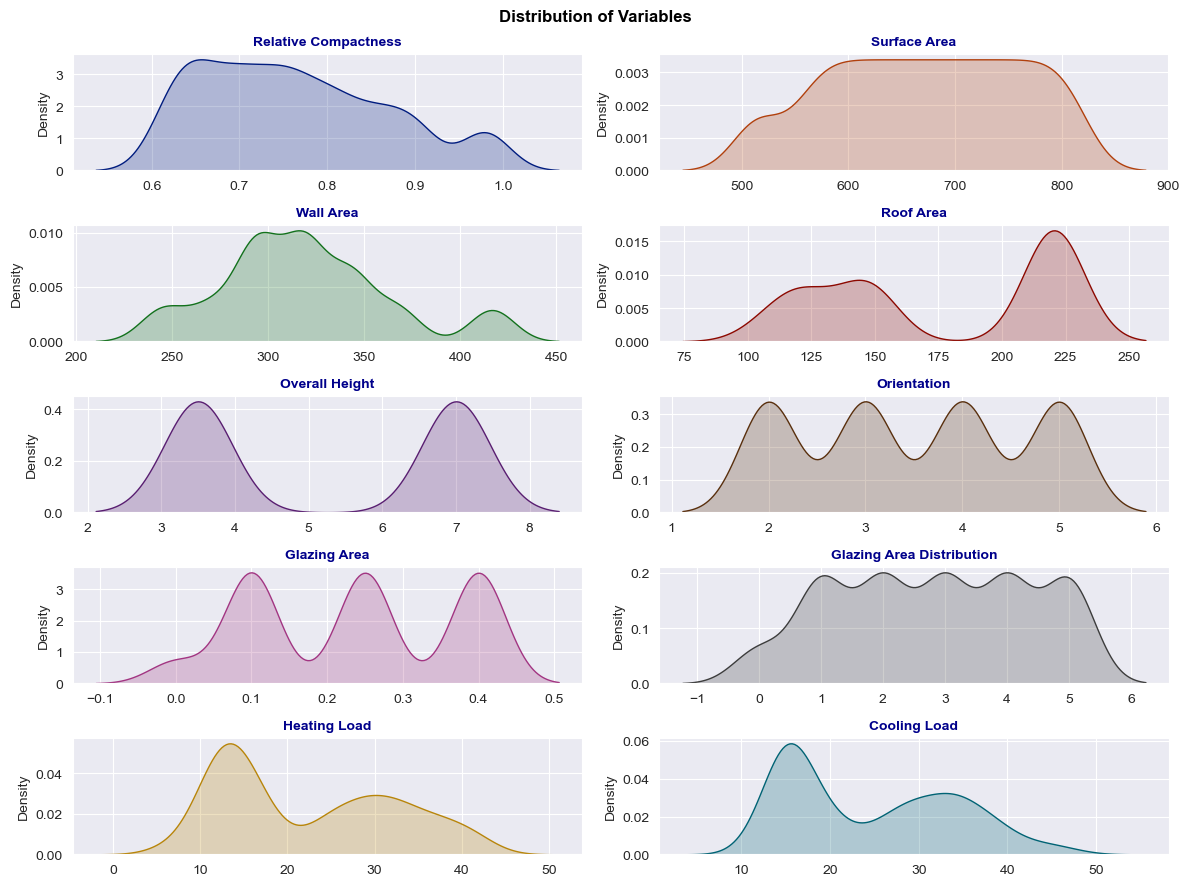

In [6]:
# KDE plot
sns.set_style("darkgrid")
colors = sns.color_palette(palette = 'dark', n_colors = len(data))
fig,axs = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 9))
axs = axs.flat

for i,num_feat in enumerate(data):
    sns.kdeplot(data, x = num_feat, fill = True, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_feat, fontsize = 10, fontweight = 'bold', color = 'darkblue')

fig.suptitle("Distribution of Variables", fontsize = 12, fontweight = 'bold', color = 'black')
fig.tight_layout()
fig.show()

The KDE plot revealed the following:
- The Relative Compactness appears to be right skewed, with most of its data points between 0.65 and 0.8
- The Surface Area appears to be left skewed, with most of the data points between 600 and 800
- The Wall Area data points appear to be somewhat normally distributed and also sightly bimodal, with most of its data points around 300
- The Roof Area is a bimodal distribution with peak value counts around 135 and 225
- The Overall Height appears to be a perfect bimodal distribution, with data points around 3.5 and 7 
- The Orientation is a multi-modal distribution having four peak value counts (2, 3, 4, and 5) that appear to have data evenly distributed amongst them 
- The Glazing Area is a multi-modal distribution having three peak value counts (0.1, 0.25, an 0.4) that appear to have data evenly distributed amongst them 
- The Glazing Area Distribution is a multi-modal distribution having five peak value counts (1, 2, 3, 4, 5) that appear to have data evenly distributed amongst them
- Heating Load appears to be a bimodal distribution with peak value counts around 14 and 30
- Cooling Load appears to be a bimodal distribution with peak value counts around 16 and 33


**Next, I'll use a correlation matrix to show the relationship between the different variables contained in the dataset**

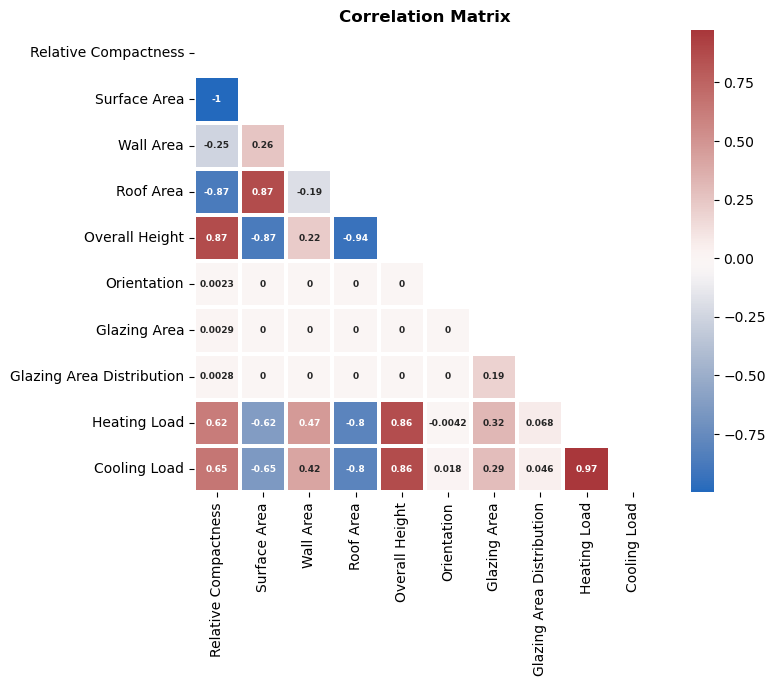

In [7]:
# correlation plot

plt.style.use('default')
corr_matrix_spearman = data.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix_spearman, dtype = bool))

fig,ax = plt.subplots(figsize = (9, 6))
sns.heatmap(corr_matrix_spearman, 
            cmap = sns.color_palette("vlag", as_cmap=True), 
            annot = True, 
            annot_kws = {'fontsize':6.5, 'fontweight':'bold'}, 
            linewidths = 1.5, 
            square = True, 
            mask = mask,
            ax = ax)
ax.set_title("Correlation Matrix", fontsize = 12, fontweight = 'bold', color = 'black')
fig.show()

**From the correlation plot above, it can be seen that there exists a perfect correlation (a correlation coeffient of 1) between Relative Compactness and Surface Area, so much that they share exactly the same absolute correlation coefficient with every other variable. This poses potential problems, particularly for models sensitive to multicollinearity, such as linear regression and other models that rely on the independence of features. So to avoid these problems, the Surface Area column will be dropped.**

## 4. Data preprocessing and modeling

- **Import relevant libraries**

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

- **Split and standardize the dataset**

In [9]:
X = data[['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
y = data[['Heating Load', 'Cooling Load']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- **Create a function to train and test models**

In [10]:
# Function to train and test models
def train_and_test_models(X_train, X_test, y_train, y_test):
    # Define the algorithms to compare
    models = {
        "Linear Regression": MultiOutputRegressor(LinearRegression()),
        "Ridge Regression": MultiOutputRegressor(Ridge()),
        "Lasso Regression": MultiOutputRegressor(Lasso()),
        "SVR": MultiOutputRegressor(SVR()),
        "K-Nearest Neighbors": MultiOutputRegressor(KNeighborsRegressor()),
        "Decision Tree": MultiOutputRegressor(DecisionTreeRegressor()),
        "Random Forest": MultiOutputRegressor(RandomForestRegressor(n_estimators=100)),
        "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
        "Neural Network": MultiOutputRegressor(MLPRegressor(max_iter=500))
    }

    # Dictionary to store trained models and predictions
    trained_models = {}
    predictions = {}

    # Train each model and store the predictions
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        trained_models[name] = model
        predictions[name] = y_pred

    return trained_models, predictions


In [11]:
# Train and test models
trained_models, predictions = train_and_test_models(X_train, X_test, y_train, y_test)
trained_models

{'Linear Regression': MultiOutputRegressor(estimator=LinearRegression()),
 'Ridge Regression': MultiOutputRegressor(estimator=Ridge()),
 'Lasso Regression': MultiOutputRegressor(estimator=Lasso()),
 'SVR': MultiOutputRegressor(estimator=SVR()),
 'K-Nearest Neighbors': MultiOutputRegressor(estimator=KNeighborsRegressor()),
 'Decision Tree': MultiOutputRegressor(estimator=DecisionTreeRegressor()),
 'Random Forest': MultiOutputRegressor(estimator=RandomForestRegressor()),
 'Gradient Boosting': MultiOutputRegressor(estimator=GradientBoostingRegressor()),
 'Neural Network': MultiOutputRegressor(estimator=MLPRegressor(max_iter=500))}

**Visualize (in tabular form) the actual heating and cooling loads against predictions by each model**

In [12]:
# Create a DataFrame for each model and concatenate them
pred = pd.concat({model: pd.DataFrame(data) for model, data in predictions.items()}, axis=1)

# Rename columns for clarity
pred.columns = pd.MultiIndex.from_product([predictions.keys(), ['Heating load pred', 'Cooling load pred']])

# Reset indexes for y_test and predicted values for better concatenation
pred.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Concatenate both dataframes for easy comparisons of model predictions against the actual heating and cooling loads
pred = pd.concat([y_test, pred], axis=1)
pd.set_option('display.max_columns', None)
pred.head()


,Heating Load,Cooling Load,"(Linear Regression, Heating load pred)","(Linear Regression, Cooling load pred)","(Ridge Regression, Heating load pred)","(Ridge Regression, Cooling load pred)","(Lasso Regression, Heating load pred)","(Lasso Regression, Cooling load pred)","(SVR, Heating load pred)","(SVR, Cooling load pred)","(K-Nearest Neighbors, Heating load pred)","(K-Nearest Neighbors, Cooling load pred)","(Decision Tree, Heating load pred)","(Decision Tree, Cooling load pred)","(Random Forest, Heating load pred)","(Random Forest, Cooling load pred)","(Gradient Boosting, Heating load pred)","(Gradient Boosting, Cooling load pred)","(Neural Network, Heating load pred)","(Neural Network, Cooling load pred)"
0,16.47,16.90,19.572438,20.449899,19.602145,20.518700,18.519166,19.661299,17.269838,18.300967,18.360,20.408,15.09,17.14,15.6639,17.0381,15.552816,16.818651,18.592287,19.261562
1,13.17,16.39,13.928815,16.642093,13.942474,16.653406,14.915590,17.422182,13.461857,16.241027,13.800,16.672,13.18,16.27,13.1566,15.9972,13.004464,16.387786,14.556793,16.833755
2,32.82,32.78,31.771202,32.435815,31.877729,32.565034,31.182896,32.408128,31.345853,32.271240,33.062,33.908,32.82,32.96,32.8022,33.3751,32.541890,33.227434,32.889671,32.991354
3,41.32,46.23,35.896375,36.717869,35.810295,36.634291,32.800157,33.521126,37.078643,37.920617,36.684,38.864,42.49,44.16,42.1154,44.0076,41.925122,42.113622,36.874137,38.513076
4,16.69,19.76,15.652390,17.591071,15.673411,17.628595,15.724220,17.978681,13.852593,15.832340,14.060,16.598,16.99,19.65,16.7766,20.0388,16.891050,20.445673,14.266637,16.013496


- **Create a function to evaluate models based on:**   
**Mean_Absolute_Error, Root_Mean_Squared_Error, and R2_score**

In [13]:
# Function to evaluate models
def evaluate_models(predictions, y_test):
    # Dictionary to store evaluation metrics
    results = {}

    # Evaluate each model
    for name, y_pred in predictions.items():
        mae = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
        rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='uniform_average'))
        r2 = r2_score(y_test, y_pred, multioutput='uniform_average')

        # Store the results
        results[name] = {
            "MAE": mae,
            "RMSE": rmse,
            "R² Score": r2
        }

    # Convert the results to a DataFrame and return
    return pd.DataFrame(results).T


In [14]:
# Evaluate models
evaluation_results = evaluate_models(predictions, y_test)
evaluation_results

,MAE,RMSE,R² Score
Linear Regression,2.239033,3.121298,0.900522
Ridge Regression,2.242270,3.129843,0.899966
Lasso Regression,2.651078,3.617767,0.866190
SVR,2.031214,3.075506,0.902798
K-Nearest Neighbors,1.928260,2.930026,0.912087
Decision Tree,0.781039,1.496430,0.976065
Random Forest,0.727883,1.294878,0.982056
Gradient Boosting,0.719198,1.142727,0.986074
Neural Network,1.930359,2.788163,0.920185


- **Create a function to perform cross-validation and compare models**

In [15]:
# Function to perform cross-validation and compare models
def cross_validate_models(trained_models, X_train, y_train):
    # Dictionary to store cross-validation results
    cv_results = {}

    # Perform cross-validation
    for name, model in trained_models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.mean(np.sqrt(-cv_scores))
        cv_results[name] = cv_rmse

    return cv_results


In [16]:
# Cross-validate models
cv_results = cross_validate_models(trained_models, X_train, y_train)
cv_results

{'Linear Regression': 3.198527537227812,
 'Ridge Regression': 3.1662269404728995,
 'Lasso Regression': 3.5530122750469437,
 'SVR': 3.0774505663604677,
 'K-Nearest Neighbors': 2.998288372544706,
 'Decision Tree': 1.4594978999954247,
 'Random Forest': 1.2748777110555771,
 'Gradient Boosting': 1.147822239266495,
 'Neural Network': 2.954454453672605}

- **Create a function to visualize reults/performance by comparing errors from the models**

In [17]:
# Function to visualize the results
def visualize_results(evaluation_results, cv_results):
    # Add cross-validation results to the evaluation DataFrame
    evaluation_results['Cross-Validated RMSE'] = evaluation_results.index.map(cv_results)

    # Print the evaluation results
    print(evaluation_results)

    # Plot the comparison of algorithms
    evaluation_results[['Cross-Validated RMSE', 'RMSE']].plot(kind='bar', figsize=(12, 6))
    plt.title('Comparison of Algorithms (Multi-Output Models)')
    plt.ylabel('Error (Lower is Better)')
    plt.show()


                          MAE      RMSE  R² Score  Cross-Validated RMSE
Linear Regression    2.239033  3.121298  0.900522              3.198528
Ridge Regression     2.242270  3.129843  0.899966              3.166227
Lasso Regression     2.651078  3.617767  0.866190              3.553012
SVR                  2.031214  3.075506  0.902798              3.077451
K-Nearest Neighbors  1.928260  2.930026  0.912087              2.998288
Decision Tree        0.781039  1.496430  0.976065              1.459498
Random Forest        0.727883  1.294878  0.982056              1.274878
Gradient Boosting    0.719198  1.142727  0.986074              1.147822
Neural Network       1.930359  2.788163  0.920185              2.954454


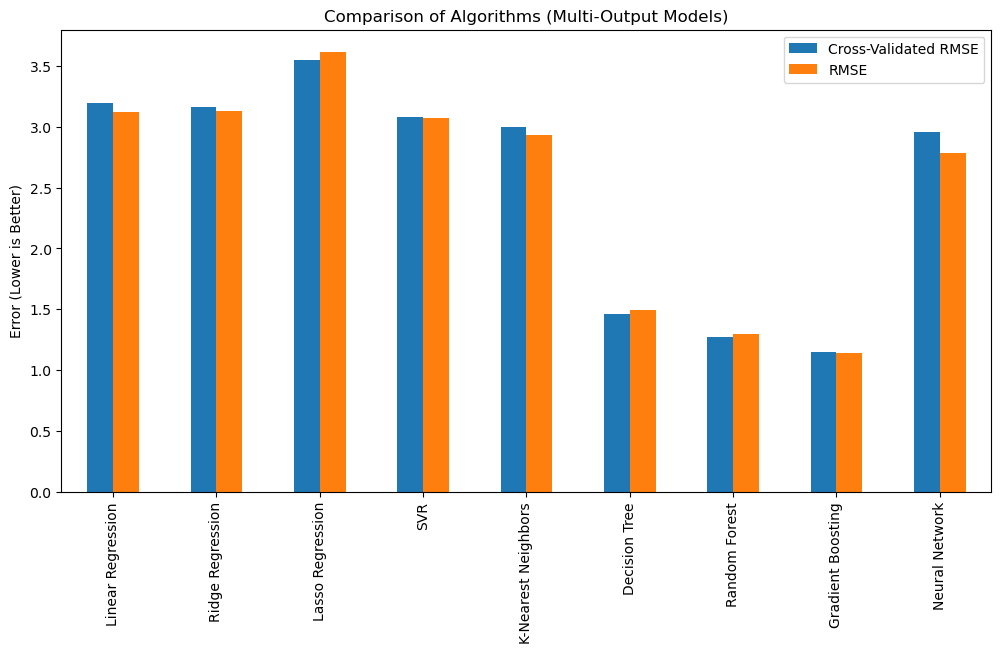

In [18]:
# Visualize the results
visualize_results(evaluation_results, cv_results)

**The best performing model was the Gradient Boosting with the least error of 1.1kWh, and the second best was the Random Forest model with an error of 1.3kWh.**